## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
from google.colab import files 
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils.py


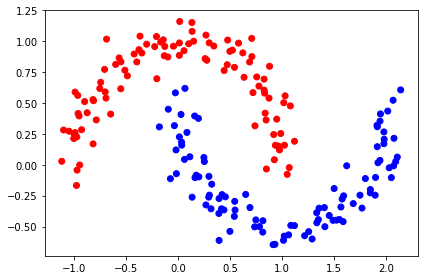

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer 

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
X_train.shape[1]


2

In [ ]:
### YOUR CODE HERE ###
perceptron = Sequential()
dim = X_train.shape[1]
layer_1 = Dense(units = 1, input_dim = dim, activation = 'sigmoid')
perceptron.add(layer_1)

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy". 

In [ ]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)


Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
perceptron.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.8640
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8613
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8570
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8514
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8457
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8395
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8332
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8272
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8210
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8148
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.8087
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.8028
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

Q3. Compute accuracy by implementing your own function. 

In [ ]:
y_preds = perceptron.predict(X_test) 

In [ ]:
y_preds = y_preds.T.round()

In [ ]:
### Build your own function to calculate accuracy###
def accuracy(y, y_preds):
  true_positives = ((y == 1) & (y_preds == 1)).sum()
  true_negatives = ((y == 0) & (y_preds == 0)).sum()
  false_positives = ((y == 0) & (y_preds == 1)).sum()
  false_negatives = ((y == 1) & (y_preds == 0)).sum()
  accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)    
  return(accuracy)

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.775


Text(18.75, 0.5, 'Test')

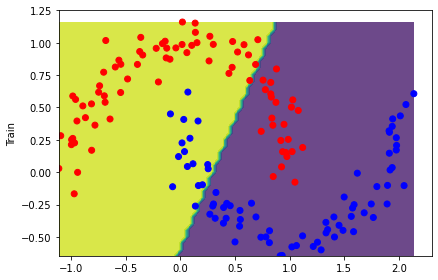

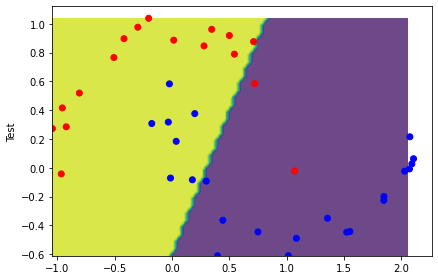

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units 
    dim = X_train.shape[1]
    layer_1 = Dense(units = 2, input_dim = dim, activation = 'relu')
    model.add(layer_1)
    # Add a final output layer with 1 unit 

    layer_2 = Dense(units = 1, input_dim = dim, activation = 'sigmoid')
    model.add(layer_2)
    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent

    # compile the model with "binary_crossentropy" loss and SGD optimizer. 
    model.compile(loss="binary_crossentropy", optimizer=sgd)

    return model


In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, epochs = 150, batch_size = 10)

Epoch 1/150
16/16 [==============================] - 0s 2ms/step - loss: 0.7635
Epoch 2/150
16/16 [==============================] - 0s 2ms/step - loss: 0.7430
Epoch 3/150
16/16 [==============================] - 0s 2ms/step - loss: 0.7216
Epoch 4/150
16/16 [==============================] - 0s 2ms/step - loss: 0.7018
Epoch 5/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6875
Epoch 6/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6729
Epoch 7/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6618
Epoch 8/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6513
Epoch 9/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6433
Epoch 10/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6354
Epoch 11/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6290
Epoch 12/150
16/16 [==============================] - 0s 2ms/step - loss: 0.6226
Epoch 13/150
16/16 [=================

Q3. Compute accuracy by using your own function.

In [ ]:
y_preds2 = model.predict(X_test) 
y_preds2 = y_preds2.round().T

In [ ]:
### YOUR CODE HERE ###
def accuracy(y, y_preds):
  true_positives = ((y == 1) & (y_preds == 1)).sum()
  true_negatives = ((y == 0) & (y_preds == 0)).sum()
  false_positives = ((y == 0) & (y_preds == 1)).sum()
  false_negatives = ((y == 1) & (y_preds == 0)).sum()
  accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)    
  return(accuracy)

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds2)}')

The accuracy is: 0.825


Text(18.75, 0.5, 'Test')

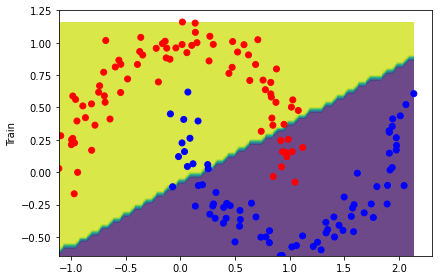

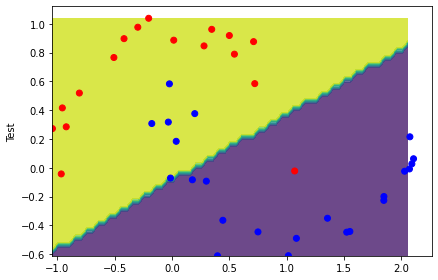

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". 

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    input = Dense(units = 10, input_dim = 2, activation = 'relu')
    model.add(input)

    hidden_layer_2 = Dense(units = 5, input_dim = 10, activation = 'relu')
    model.add(hidden_layer_2)

    readout_layer = Dense(units = 2, input_dim = 5, activation = 'softmax')
    model.add(readout_layer)

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.01, decay=1e-7, momentum=.9)  # Stochastic gradient descent

    # compile the model with "binary_crossentropy" loss and SGD optimizer. 
    model.compile(loss="categorical_crossentropy", optimizer=sgd)
    
    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train_vectorized, epochs = 150, batch_size = 10)

Epoch 1/150
16/16 [==============================] - 0s 2ms/step - loss: 0.5738
Epoch 2/150
16/16 [==============================] - 0s 2ms/step - loss: 0.4790
Epoch 3/150
16/16 [==============================] - 0s 2ms/step - loss: 0.3902
Epoch 4/150
16/16 [==============================] - 0s 2ms/step - loss: 0.3373
Epoch 5/150
16/16 [==============================] - 0s 3ms/step - loss: 0.3020
Epoch 6/150
16/16 [==============================] - 0s 2ms/step - loss: 0.2841
Epoch 7/150
16/16 [==============================] - 0s 2ms/step - loss: 0.2735
Epoch 8/150
16/16 [==============================] - 0s 2ms/step - loss: 0.2728
Epoch 9/150
16/16 [==============================] - 0s 2ms/step - loss: 0.2599
Epoch 10/150
16/16 [==============================] - 0s 2ms/step - loss: 0.2582
Epoch 11/150
16/16 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 12/150
16/16 [==============================] - 0s 2ms/step - loss: 0.2465
Epoch 13/150
16/16 [=================

Q3. Compute accuracy by using your own function

In [ ]:
y_preds3 = model.predict(X_test) 
y_preds3 = np.argmax(y_preds3, axis=1)

In [ ]:
def accuracy(y, y_preds):
  true_positives = ((y == 1) & (y_preds == 1)).sum()
  true_negatives = ((y == 0) & (y_preds == 0)).sum()
  false_positives = ((y == 0) & (y_preds == 1)).sum()
  false_negatives = ((y == 1) & (y_preds == 0)).sum()
  accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)    
  return(accuracy)

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds3)}')

The accuracy is: 1.0


Text(18.75, 0.5, 'Test')

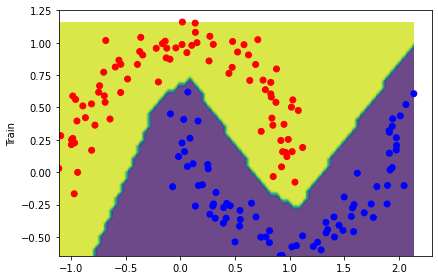

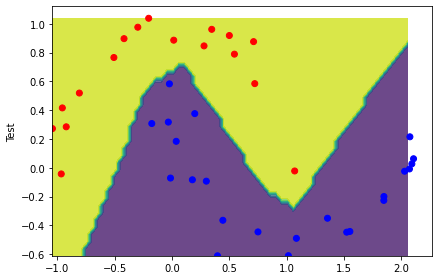

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.

Having too high of a learning rate for full batch gradient descent will make the learning jump over minima, either local or global. For SGD, having a high learning rate causes the gradient descent to bounce around the desired minima without ever possibly reaching it.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Flipping, mirroring, upside-down and rotating might not be beneficial to handwritten digits because it might create confusion, for example, hard to distinguish between 6 and 9. 

Q3. Suppose we have the following two neural networks containing fully-connected layers only. 
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Network A is better than Network B because if you have too many layers in your network, your model may tend to overfit and not be able to represent well samples from outside the training set.

Network B is better than Network A because a single layer network is usually only good for linear problems and having hidden layers is good for data that must be separated non-linearly.


# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records. 

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/> 
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import io

In [ ]:
### YOUR CODE HERE ###
uploaded_train = files.upload()

Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
uploaded_test = files.upload()

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv


In [ ]:
# Split data into X (features) and y (target)
# Please make sure y is in a one-hot representation
# WRITE CODE HERE
from tensorflow.keras.utils import to_categorical
df_train = pd.read_csv(io.BytesIO(uploaded_train['CreditDefault_training.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded_test['CreditDefault_Xtest.csv']))
x_features = list(df_train.columns)
x_features.remove("default.payment.next.month")

X = df_train[x_features]
y = df_train['default.payment.next.month']
y = to_categorical(y)

In [ ]:
#standardization and one-hot encoding 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

# Defining custom function to perform standard scaling on any DataFrame
def scaler_function(df, arg_scaler = None, fit = True):
  """Function to perform scaling of features.
  
     When `fit` = True, the scaler will do both fit and transform of the data.
     When `fit` = False, the scaler will ONLY transform the data.
     
     Function returns the transformed data and the scaler object. """
    
  df_cols = list(df.columns)

  scaler = StandardScaler()

  if((arg_scaler != None) | (fit == False)):
    scaler = arg_scaler

  if(fit == True):
    df = scaler.fit_transform(df)
  
  if(fit == False):
    df = scaler.transform(df)
  
  df = pd.DataFrame(df, columns = df_cols)

  return(df, scaler)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Defining a function to perform One Hot Encoding on categorical features for any DataFrame
def one_hot_enc(df, arg_encoder = None, arg_categories = [], fit = True):
  """Function to perform One Hot Encoding on categorical features.
  
     When `fit` = True, the encoder will do both fit and transformation of the data.
     When `fit` = False, the encoder will ONLY transform the data.
     
     Function returns the transformed data and the encoder object. """

  df_cols = list(df.columns)

  if(arg_categories == []):
    encoder = OneHotEncoder(drop='first')
  else:
    encoder = OneHotEncoder(categories=arg_categories, drop='first')

  if((arg_encoder != None) | (fit == False)):
    encoder = arg_encoder

  if(fit == True):
    df = encoder.fit_transform(df).toarray()
  
  if(fit == False):
    df = encoder.transform(df).toarray()

  df =  pd.DataFrame(df, columns=encoder.get_feature_names(df_cols))

  return(df, encoder)

In [ ]:
# Transforming features in the training data

categorical_features_1 = ['SEX', 'EDUCATION', 'MARRIAGE']
categorical_features_2 = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
numeric_features = [x for x in x_features if x not in (categorical_features_1 + categorical_features_2)]

# Separating numeric features into two groups
# Group 1: Will apply StandardScaler()
# Group 2: Will apply PowerTransformer() to deal with Outliers

group_2_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
                'PAY_AMT5', 'PAY_AMT6']

group_1_cols = [x for x in numeric_features if x not in group_2_cols]

In [ ]:
# Standard Scaling numeric features
scaler_features = StandardScaler()
x_numeric_1 = X[group_1_cols]
x_numeric_1, scaler_features = scaler_function(x_numeric_1, 
                                               arg_scaler=scaler_features, 
                                               fit=True)
x_numeric_1.head()

,LIMIT_BAL,AGE
0,-0.902690,-1.237370
1,-0.751263,-1.237370
2,1.898720,0.816144
3,-1.054118,1.896941
4,-0.902690,1.464622


In [ ]:
# PowerTransforming numeric features
power_transformer = PowerTransformer()
x_numeric_2 = X[group_2_cols]
x_numeric_2, power_transformer = scaler_function(x_numeric_2, 
                                                 arg_scaler=power_transformer, 
                                                 fit=True)
x_numeric_2.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-0.731557,-0.684987,-0.715906,-0.545989,-0.545733,-0.632403,-0.058713,-0.030237,0.805279,-0.728223,-0.336674,1.662815
1,0.273323,0.264540,0.392039,0.426519,0.470089,0.549564,0.253949,0.269087,0.317418,0.477118,0.810408,-1.506618
2,-0.570636,-0.446888,-0.557705,-0.635298,-0.589544,-0.513574,1.213665,0.821282,0.379271,0.481324,0.823192,1.770770
3,-0.794453,-0.727505,-0.640176,-0.610284,-0.572260,-0.642689,-1.730098,0.424375,-1.619770,-1.578911,-1.541706,-1.506618
4,-0.358004,-0.359262,-0.248989,-0.245560,-0.229752,-0.213044,-0.253133,0.319789,-1.619770,0.006968,0.028726,0.063643


In [ ]:
# One hot encoding categorical features in the training data
x_categorical_1 = X[categorical_features_1]
x_categorical_1, ohe_1 = one_hot_enc(x_categorical_1,
                                     arg_categories=[],
                                     fit=True)

x_categorical_1.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_2,MARRIAGE_3
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# One hot encoding categorical features
x_categorical_2 = X[categorical_features_2]
categories_list = [[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                   [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

x_categorical_2, ohe_2 = one_hot_enc(x_categorical_2,
                                     arg_categories=categories_list,
                                     fit=True)

x_categorical_2.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_1_9,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_2_9,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_3_9,PAY_4_-1,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_4_9,PAY_5_-1,PAY_5_0,PAY_5_1,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_5_9,PAY_6_-1,PAY_6_0,PAY_6_1,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,PAY_6_9
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Combining the transformed datasets (numeric and categorical) in one dataset
X = pd.concat([x_numeric_1, x_numeric_2, x_categorical_1, x_categorical_2], 
              axis=1)
print(f'Shape of the transformed training data: {X.shape}')

Shape of the transformed training data: (3985, 88)


In [ ]:
# Scaling numeric data
x_numeric_1 = df_test[group_1_cols]
x_numeric_1, scaler_features = scaler_function(x_numeric_1, arg_scaler = scaler_features, 
                                      fit=False)

# Robust Scaling numeric features
x_numeric_2 = df_test[group_2_cols]
x_numeric_2, power_transformer = scaler_function(x_numeric_2, arg_scaler = power_transformer, 
                                    fit=False)

# One hot encoding
x_categorical_1 = df_test[categorical_features_1]
x_categorical_1, ohe_1 = one_hot_enc(x_categorical_1,
                                     arg_categories = [],
                                     fit=False,
                                     arg_encoder=ohe_1)

# One hot encoding
x_categorical_2 = df_test[categorical_features_2]
x_categorical_2, ohe_2 = one_hot_enc(x_categorical_2,
                                     arg_categories = categories_list,
                                     fit=False,
                                     arg_encoder=ohe_2)

# Combining transformed datasets (numeric and categorical) in one dataset
X_test = pd.concat([x_numeric_1, x_numeric_2, x_categorical_1, x_categorical_2], 
                   axis=1)
del(x_numeric_1, x_numeric_2, x_categorical_1, x_categorical_2)
X_test.shape

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1000, 88)

In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train
X_train.shape

(2789, 88)

Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [ ]:
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    
    # First add fully-connected (Dense) hidden layers with appropriate input dimension

    input = Dense(units = 32, input_dim = 88, activation = 'relu')
    model.add(input)
    
    # Drop out layer
    model.add(Dropout(0.2))

    # Continues the process 
    hidden_layer_2 = Dense(units = 25, input_dim = 32, activation = 'relu')
    model.add(hidden_layer_2)
    model.add(Dropout(0.2))

    hidden_layer_3 = Dense(units = 20, input_dim = 25, activation = 'relu')
    model.add(hidden_layer_3)
    model.add(Dropout(0.2))

    hidden_layer_4 = Dense(units = 10, input_dim = 20, activation = 'relu')
    model.add(hidden_layer_4)
    model.add(Dropout(0.2))


    # Finally, add a readout layer
    readout_layer = Dense(units = 2, input_dim = 10, activation = 'softmax')
    model.add(readout_layer)

    ######################
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    

    return model

In [ ]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
88/88 [==============================] - 1s 2ms/step - loss: 0.5926 - accuracy: 0.7519
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7673
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.7662
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7669
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5397 - accuracy: 0.7669
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5373 - accuracy: 0.7669
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5407 - accuracy: 0.7669
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5318 - accuracy: 0.7669
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5278 - accuracy: 0.7669
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7669
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
y_preds4 = model.predict(X_val)


In [ ]:
def precision(y, y_preds): #TP/(TP+FP)
    true_positives = ((y == 1) & (y_preds == 1)).sum()
    false_positives = ((y == 0) & (y_preds == 1)).sum()
    precision = true_positives / (true_positives + false_positives)
    return(precision)

def recall(y, y_preds): #TP/(TP+FN)
    true_positives = ((y == 1) & (y_preds == 1)).sum()
    false_negatives = ((y == 1) & (y_preds == 0)).sum()
    recall = true_positives / (true_positives + false_negatives)    
    return(recall)

def accuracy(y, y_preds): #(TP+TN)/(TP+FP+FN+TN)
    true_positives = ((y == 1) & (y_preds == 1)).sum()
    true_negatives = ((y == 0) & (y_preds == 0)).sum()
    false_positives = ((y == 0) & (y_preds == 1)).sum()
    false_negatives = ((y == 1) & (y_preds == 0)).sum()
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)    
    return(accuracy)

In [ ]:
y_val = np.argmax(y_val, axis = 1)

In [ ]:
y_preds4 = np.argmax(y_preds4, axis = 1)

In [ ]:
F1 = 2 * (precision(y_val, y_preds4) * recall(y_val, y_preds4)) / (precision(y_val, y_preds4) + recall(y_val, y_preds4))
print(F1)

0.49457700650759223


Q5. Plot the ROC curve by giving appropriate names for title and axes.

AUC: 0.780521558275338


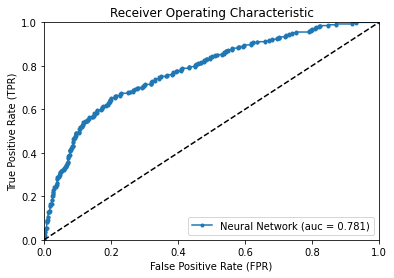

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes. 
### WRITE CODE HERE

from sklearn.metrics import roc_curve
import sklearn.metrics as metrics

y_prob = model.predict(X_val)
auc = metrics.roc_auc_score(y_val, y_prob[:,1])
print(f'AUC: {auc}')

fper, tper, thresholds =  roc_curve(y_val, y_prob[:,1])
plt.plot(fper, tper, marker = '.', label = 'Neural Network (auc = %0.3f)' % auc)
plt.title('ROC curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.show()

Is the accurancy value impressive for this dataset? Please explain based on the structure of this dataset. 

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans-
Accuracy is how well is our prediction. Precision relates to customer satisfaction in this senario. Recall is how accurate we recognize the customer who default. F1 measures the harmonic mean of both precision and recall. AUC measures how well we distinguish the positive. For this dataset, we should use F1 and recall because we don't want to falsely classify people with less credibility.


#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from keras.wrappers.scikit_learn import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
# Build create_model function with activation function and learning rate of SGD as parameters
def create_model(learning_rate, activation):
  
    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate = learning_rate, decay=1e-7, momentum=.9)
  
    # Create your neural network model 
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.
    
    ### WRITE CODE HERE
    input = Dense(units = 64, input_dim = 88, activation = activation)
    model.add(input)
    
    # Drop out layer
    model.add(Dropout(0.25))

    # Continues the process 
    hidden_layer_2 = Dense(units = 32, input_dim = 64, activation = activation)
    model.add(hidden_layer_2)
    model.add(Dropout(0.25))

    hidden_layer_3 = Dense(units = 16, input_dim = 32, activation = activation)
    model.add(hidden_layer_3)
    model.add(Dropout(0.25))

    hidden_layer_4 = Dense(units = 8, input_dim = 16, activation = activation)
    model.add(hidden_layer_4)
    model.add(Dropout(0.25))

    # Finally, add a readout layer
    readout_layer = Dense(units = 2, input_dim = 8, activation = 'softmax')
    model.add(readout_layer)

    
    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE
param_grid = {
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [100, 200, 500],
    'learning_rate': [0.01, 0.001, 0.0001]
}

Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search. 

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [ ]:
### WRITE CODE HERE 
random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = param_grid,
                                   cv = 5) 


In [ ]:
random_search_results = random_search.fit(X_train, y_train) # it may take several hours.

Q8. Print the best model parameters 

In [ ]:
### WRITE CODE HERE 
random_search_results.best_params_

{'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'learning_rate': 0.001}

In [ ]:
random_search_results.best_score_

0.8146168470382691

Q9. Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE 
best_model = random_search_results.best_estimator_

Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE 
y_preds_rcv = best_model.predict(X_val)
print(f'accuracy {accuracy(y_val, y_preds_rcv)}')
print(f'precision {precision(y_val, y_preds_rcv)}')
print(f'recall {recall(y_val, y_preds_rcv)}')
F1 = 2 * (precision(y_val, y_preds_rcv) * recall(y_val, y_preds_rcv)) / (precision(y_val, y_preds_rcv) + recall(y_val, y_preds_rcv))
print(f'F1 {F1}')


accuracy 0.8060200668896321
precision 0.584070796460177
recall 0.4888888888888889
F1 0.532258064516129


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

There is a slight improvement in scores for recall and F1 compared to the first NN model. It improved because we allowed for random search to help us find better parameters that worked better for the model. 

Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###
    logit = LogisticRegression()
    grid = {"C": [0.5, 1], "penalty": ["l1", 'l2'], "solver" : ['liblinear']}
    logit_cv = GridSearchCV(estimator=logit,param_grid = grid, cv = 5)
    
 
    ######################
    return logit_cv.fit(X_train,np.argmax(y_train, axis=1))# Return a logistic model with the best parameters you foun

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###
best_model_logit = logistic_regression_model(X_train, y_train)
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###
y_preds_logit = best_model_logit.predict(X_val)

In [ ]:
print(f'accuracy: {accuracy(y_val, y_preds_logit)}')
print(f'precision: {precision(y_val, y_preds_logit)}')
print(f'recall: {recall(y_val, y_preds_logit)}')
F1 = 2 * (precision(y_val, y_preds_logit) * recall(y_val, y_preds_logit)) / (precision(y_val, y_preds_logit) + recall(y_val, y_preds_logit))
print(f'F1 {F1}')

accuracy: 0.822742474916388
precision: 0.6647727272727273
recall: 0.43333333333333335
F1 0.5246636771300448


Q13. Plot the ROC curve by giving appropriate names for title and axes. 

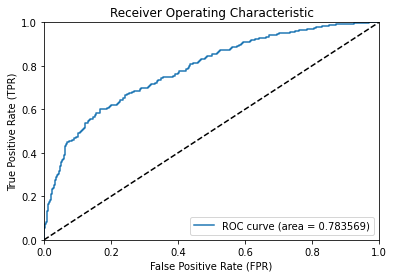

In [ ]:
### WRITE CODE HERE
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc

y_pred_proba = best_model_logit.predict_proba(X_val)[::,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [ ]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state=26) # Please set the random state to be 26
    ### YOUR CODE HERE ###
    param_grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [2, 4],
    'n_estimators': [500, 1000]
}

    grid_search = GridSearchCV(estimator = rf, scoring = 'recall', param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)
    return grid_search.fit(X_train, y_train) # Return a logistic model with the best parameters you found and random_state=26

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE
y_train = np.argmax(y_train, axis = 1)
rf = random_forest_model(X_train, y_train)
y_preds_rf = rf.predict(X_val)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
rf.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
y_preds_rf

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
print(f'accuracy {accuracy(y_val, y_preds_rf)}')
print(f'precision {precision(y_val, y_preds_rf)}')
print(f'recall {recall(y_val, y_preds_rf)}')
F1 = 2 * (precision(y_val, y_preds_rf) * recall(y_val, y_preds_rf)) / (precision(y_val, y_preds_rf) + recall(y_val, y_preds_rf))
print(f'F1 {F1}')

accuracy 0.810200668896321
precision 0.6352201257861635
recall 0.37407407407407406
F1 0.4708624708624708


Q16. Plot the ROC curve by giving appropriate names for title and axes.

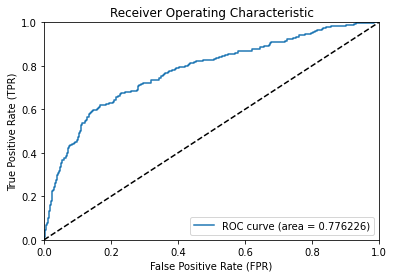

In [ ]:
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import auc
y_pred_proba = rf.predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba[::,1])
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?




NN worked best among all models. NN performs better because it is good at manipulating large number of inputs and handle complexity well, but the downside of NN is that we do not know much about the correlation between independent variables. Logistic function sometimes does not perform well because it tends to overfit the training set. The performance of random forest is highly affected by the model constructed and we have little control on the model.

Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
### YOUR CODE HERE ###
y_pred = best_model.predict(X_test)

# Exercise 6

### Convolution Neural Netwrok

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. 

The dataset which we will use in this part is Fashion-MNIST classification dataset. This is a dataset of 60,000 28x28 pixel grayscale images of items of 10 types of clothing, along with a test set of 10,000 images.

The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top<br>
1: Trouser<br>
2: Pullover<br>
3: Dress<br>
4: Coat<br>
5: Sandal<br>
6: Shirt<br>
7: Sneaker<br>
8: Bag<br>
9: Ankle boot<br>



In [ ]:
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


Create a plot of the first nine images in the training dataset.

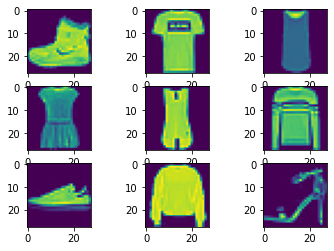

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

Q1. To process images in neural network, we have to indicate how may channels (depth) we are going to use. For instance, a coloful image from a standard digital camera will have a red, green and blue channel (RGB), so it has 3 channels (i.e. depth=3) in total, whereas a grayscale image only has 1 channel (depth=1). As you can see, the  Fashion-MNIST dataset is colorful in the format of RGB, but this may increase the burden of computation in the following questions.

Reshape Fashion-MNIST from RGB to Grayscale. (i.e., Convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1.)

In [ ]:
### YOUR CODE HERE ###
import numpy as np
import tensorflow as tf

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

Q2. Normalize the pixel values of grayscale images, e.g. rescale them to the range [0, 1]. 

In [ ]:
### YOUR CODE HERE ###
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

Q3. You also need to convert the target values into binary values (one-hot encoding).

In [ ]:
### YOUR CODE HERE ###
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Q4. Implement build_cnn_model() that returns a CNN model that takes an input of image, passes it to:
- A convolution layer with 32 filters and kernel size 5x5
- A MaxPool layer of size 2x2
- Another convolution layer with 64 filters and kernel size 5x5
- Another MaxPool layer of size 2x2
- Another convolution layer with 128 filters and kernel size 3x3
- Another MaxPool layer of size 2x2
- Flatten it
- Add one regular fully-connected layer of 128 units
- Finally, output your classification by another fully-connected layer, whose number of units is determined by yourself.

Our goal is to minimize the categorical_crossentropy loss.

As before, use the "relu" activation function for all the convolution/full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
def build_cnn_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))

    model.add(Dense(10, activation='softmax'))
   
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_cnn_model()

Q5. Fit your CNN model by x_train, y_train

In [ ]:
### YOUR CODE HERE ###
cnn = build_cnn_model()
cnn.fit(x_train, y_train)

1875/1875 [==============================] - 173s 92ms/step - loss: 0.4380 - accuracy: 0.8398


Q6. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 8s 24ms/step - loss: 0.3339 - accuracy: 0.8801


[0.3339054584503174, 0.8801000118255615]

Q7. Now let's check the performance of multi-layer perceptrons (MLP) in image classfication. Implement build_mlp_model() that returns a MLP model that takes an input of image, passes it to 1 Flatten layer then 3 full-connected layers and the final fully-connected readout layer.

The number of units in each full-connected layer is determined by yourself. 

As before, use the "relu" activation function for the first 2 full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
def build_mlp_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    model.add(Flatten())
    model.add(Dense(units = 32, input_dim = 64, activation='relu'))
    model.add(Dense(units = 25, input_dim = 32, activation='relu'))
    model.add(Dense(units = 20, input_dim = 25, activation='relu'))
    model.add(Dense(units = 10, input_dim = 20, activation='softmax'))
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model2 = build_mlp_model()

Q8. Fit your MLP model by x_train, y_train. (Please use the same parameters as those in CNN model for comparison)

In [ ]:
### YOUR CODE HERE ###
mlp = build_mlp_model()
mlp.fit(x_train, y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.5908 - accuracy: 0.7909


Q9. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
mlp.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4509 - accuracy: 0.8448


[0.4508717656135559, 0.8447999954223633]

Q10. Which of the above 2 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

CNN. MLP takes vector as input and CNN takes tensor as input so CNN can understand spatial relation(relation between nearby pixels of image)between pixels of images better thus for complicated images CNN will perform better than MLP. 

# Exercise 7
### Autoencoder

So far, we have learned a lot about how to use neural networks in supervised learning, but in fact there are also many applications of neural networks in unsupervised learning such as autoencoder.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In this part, we will continue using Fashion-MNIST dataset.

Q1. Implement an autoencoder model that takes an input of 28x28x1 images, compress them into (4,) vectors by an econder, and then decompress them back to 28x28 images by a decoder. In other words, the orginal dimensionality is 784 (=28x28), but we want to compress it into the dimensionality of 4 by an encoder, then reconstruct these (4,) vectors back to 28x28 images by an decoder. 

You only need to define an encoder and a decoder. In your encoder, you need to inlude a flatten layer and several fully-connected layers, while in your decoder, you are required to use fully-connected layers and one reshape layer. Do not use other types of layers.

You will determine the number of fully-connected layers, number of units, and activation functions by yourself.

The optimizer and loss function have been filled in for you.

In [ ]:
from keras.models import Model
from keras.layers import Reshape, Input
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten
from keras.datasets import fashion_mnist

# encoder layers
encoding_dim = 4
encoded = Sequential()
# You don't need to build a new function, just add the layers
encoded.add(Flatten())
encoded.add(Dense(units = 512, input_dim = 784, activation='relu'))
encoded.add(Dense(units = 256, input_dim = 512, activation='relu'))
encoded.add(Dense(units = 64, input_dim = 128, activation='relu'))
encoded.add(Dense(units = 32, input_dim = 64, activation='relu'))
encoded.add(Dense(units = 16, input_dim = 32, activation='relu'))
encoded.add(Dense(units = 8, input_dim = 16, activation='relu'))
encoded.add(Dense(units = encoding_dim, input_dim = 8, activation='relu'))
######################

# decoder layers
decoded = Sequential()
decoded.add(Dense(units = 8, input_dim = encoding_dim, activation='relu'))
decoded.add(Dense(units = 16, input_dim = 8, activation='relu'))
decoded.add(Dense(units = 32, input_dim = 16, activation='relu'))
decoded.add(Dense(units = 64, input_dim = 32, activation='relu'))
decoded.add(Dense(units = 128, input_dim = 64, activation='relu'))
decoded.add(Dense(units = 256, input_dim = 128, activation='relu'))
decoded.add(Dense(units = 512, input_dim = 256, activation='relu'))
decoded.add(Dense(units = 784, input_dim = 512, activation='relu'))
decoded.add(Reshape((28,28), input_shape=(784,)))

######################
img_x, img_y = 28, 28
input_x = Input(shape=(img_x, img_y, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

Q2. Fit your model by x_train only

In [ ]:
### YOUR CODE HERE ###
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

autoencoder.fit(x_train, x_train)

1875/1875 [==============================] - 28s 14ms/step - loss: 0.0736


Q3. Evaluate your model on test set and print out the MSE and output images as numpy arrays.

In [ ]:
# Test your autoencoder on test set, print out the MSE
autoencoder.evaluate(x_test, x_test)
######################
# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

313/313 [==============================] - 2s 6ms/step - loss: 0.0551


Plot your encoded image

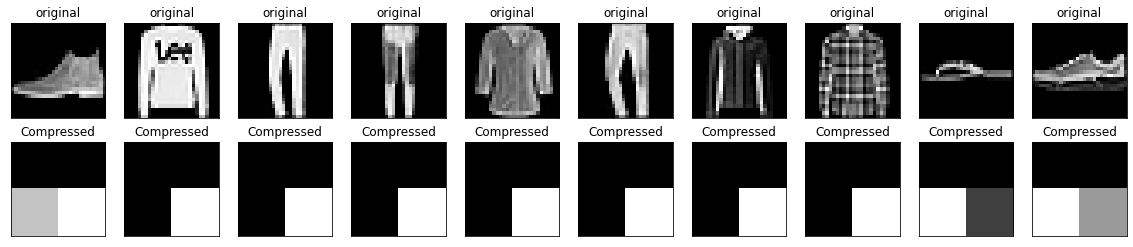

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Plot your decoded image

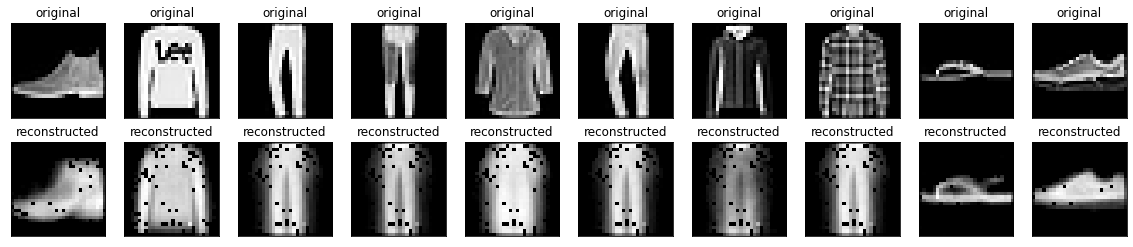

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()